In [1]:
!pip install numpy matplotlib scipy pandas plotly seaborn

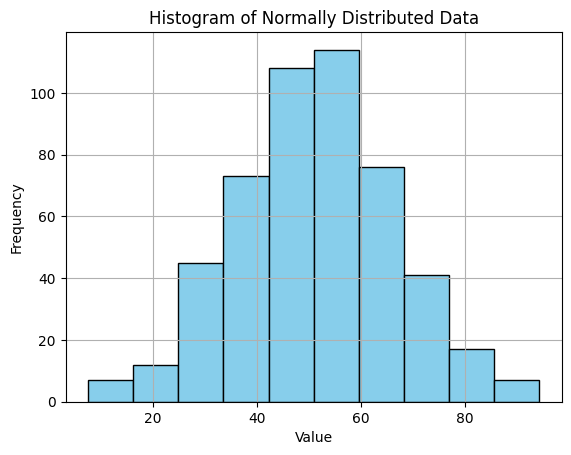

In [2]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.normal(loc=50, scale=15, size=500)
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Normally Distributed Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [3]:
from scipy.stats import skew
skew_value = skew(data)
print(f"Skewness: {skew_value:.2f}")

Skewness: 0.04


In [4]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
'X': np.random.randint(20, 100, 100),
'Y': np.random.randint(30, 120, 100)
})
correlation = df.corr()
print(correlation)

          X         Y
X  1.000000 -0.222981
Y -0.222981  1.000000


In [6]:
import pandas as pd #data analysis and manipulation.
import numpy as np # maths equation 
import plotly.graph_objects as go 
import plotly.express as px
import plotly.offline as py
from scipy.stats import norm , skew

In [8]:
df = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv").dropna()
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,3.900000e-04
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,6.500000e-03
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02
...,...,...,...,...,...,...,...,...
3793,World,Historical,EV stock,Cars,BEV,2023,Vehicles,2.800000e+07
3794,World,Historical,EV sales,Cars,BEV,2023,Vehicles,9.500000e+06
3795,World,Historical,EV sales share,Cars,EV,2023,percent,1.800000e+01
3796,World,Historical,EV stock share,Cars,EV,2023,percent,3.200000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 237.5+ KB


In [10]:
#selecting only numeric columns for futher processing

numeric_cols = df.select_dtypes(include='number').columns

In [11]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,year,value
year,1.000000,0.124555
value,0.124555,1.000000


In [12]:
print(numeric_cols)

Index(['year', 'value'], dtype='object')


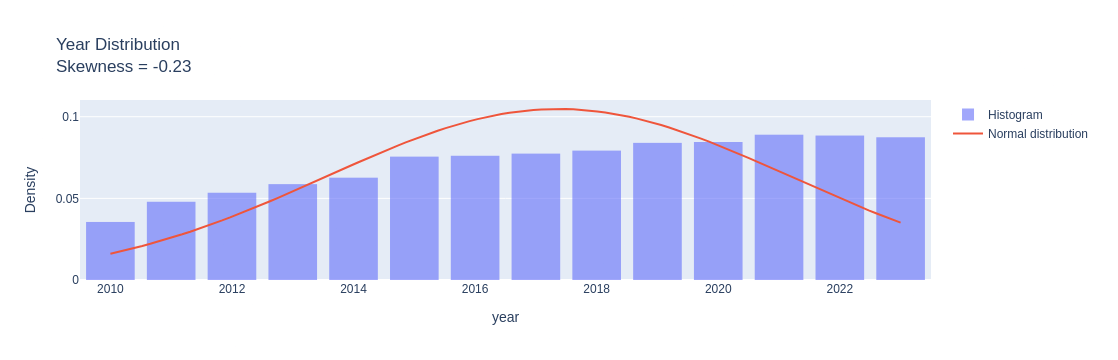

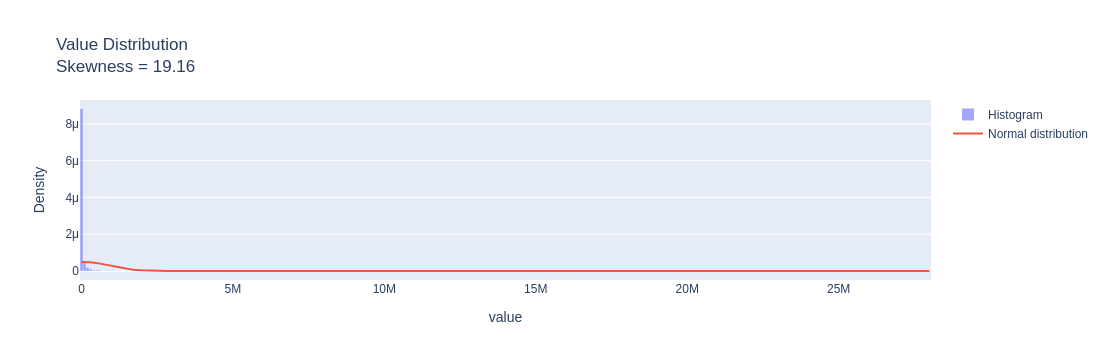

In [13]:
for col in numeric_cols:
    x = df[col]
    mean, std = x.mean(), x.std()

    # plotting histogram with density curve (mix of normal distribution and ...)
    hist = go.Histogram(x=x, histnorm='probability density', name='Histogram', opacity=0.6)
    x_range = np.linspace(x.min(), x.max(), 100)

    normal_curve = go.Scatter(
        x=x_range,
        y=norm.pdf(x_range, mean, std),mode='lines',name='Normal distribution'
    )

    layout = go.Layout(
        title=f'{col.capitalize()} Distribution<br>Skewness = {x.skew():.2f}',
        xaxis_title=col,
        yaxis_title='Density',
        bargap=0.2
       
    )

    fig = go.Figure(data=[hist, normal_curve], layout=layout)
    fig.show()

In [14]:
corr_matrix = df[numeric_cols].corr()
corr_matrix

,year,value
year,1.000000,0.124555
value,0.124555,1.000000


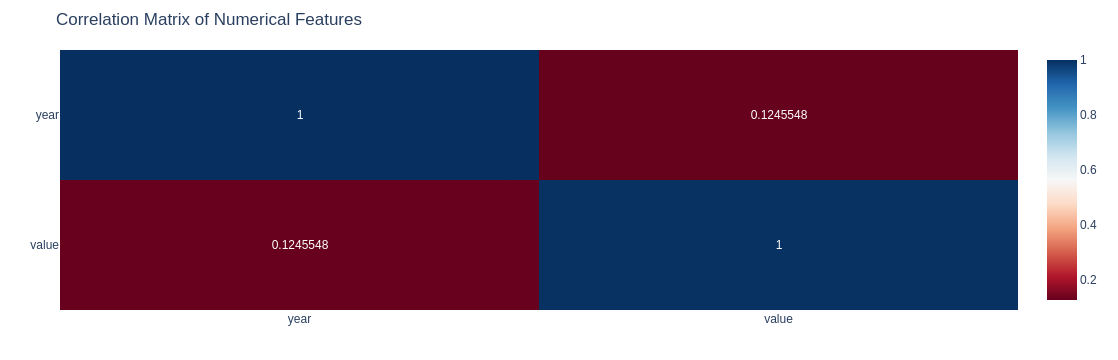

In [15]:
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu',
    title='Correlation Matrix of Numerical Features',
    aspect="auto"
)

fig.update_layout(margin=dict(l=60, r=60, t=50, b=50))
fig.show()

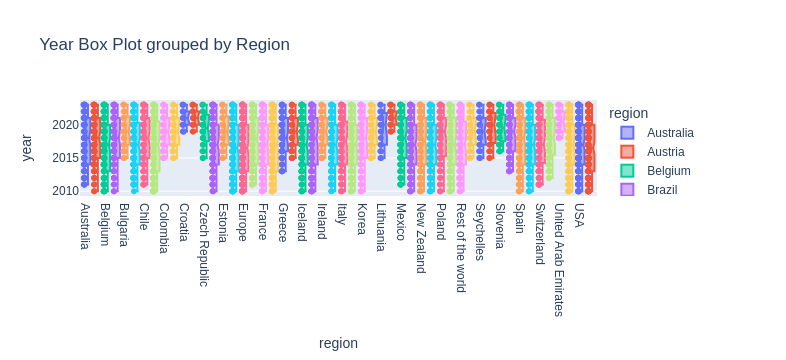

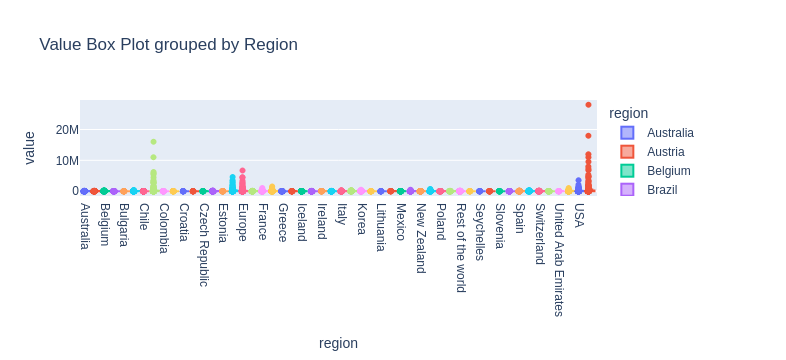

In [18]:
#Boxplot
categorical_cols= 'region'

for col in numeric_cols:
    fig = px.box(df,x=categorical_cols,y=col, points='all',color=categorical_cols,
                title=f'{col.capitalize()} Box Plot grouped by {categorical_cols.capitalize()}',
                notched=True)
    fig.update_layout(yaxis_title=col, xaxis_title=categorical_cols)
    fig.show()


--- Scenario A: EV Sales by Region ---


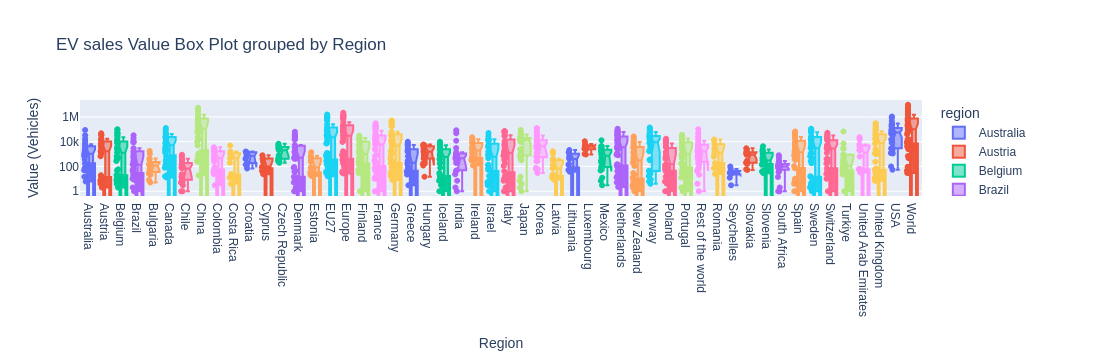

In [34]:
# Scenario A: EV Sales by Region (most common and interpretable)
print("\n--- Scenario A: EV Sales by Region ---")
target_parameter_A = 'EV sales'
df_sales_by_region = df[df['parameter'] == target_parameter_A].copy()
generate_box_plot(df_sales_by_region,
                  x_col='region',
                  y_col='value',
                  title_prefix=f'{target_parameter_A}',
                  use_log_y=True) # Recommended for sales/stock data



--- Scenario B: Value Distribution by Parameter (units vary!) ---


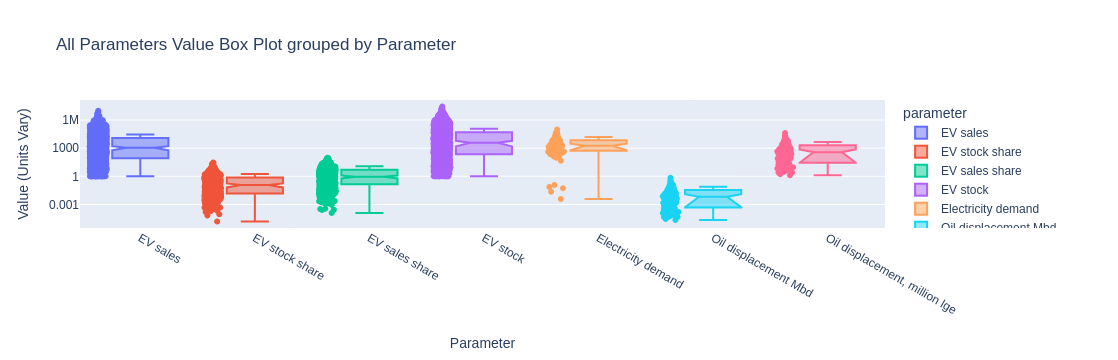

In [35]:
# Scenario B: Value Distribution by Parameter (units will vary!)
print("\n--- Scenario B: Value Distribution by Parameter (units vary!) ---")
# This plot might be less interpretable due to mixed units.
# A facet plot separating by unit would be better, or filter by unit.
generate_box_plot(df, # Use original df as we're grouping by parameter
                  x_col='parameter',
                  y_col='value',
                  title_prefix='All Parameters',
                  use_log_y=True) # Still useful for extreme values


--- Scenario C: EV Stock by Powertrain ---


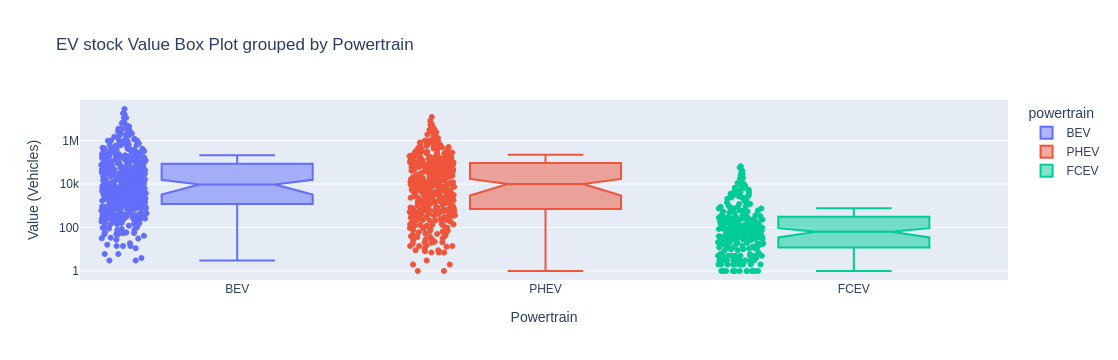

In [36]:
# Scenario C: EV Stock by Powertrain (e.g., BEV vs. PHEV)
print("\n--- Scenario C: EV Stock by Powertrain ---")
target_parameter_C = 'EV stock'
df_stock_by_powertrain = df[df['parameter'] == target_parameter_C].copy()
generate_box_plot(df_stock_by_powertrain,
                  x_col='powertrain',
                  y_col='value',
                  title_prefix=f'{target_parameter_C}',
                  use_log_y=True) # Recommended for stock data


--- Scenario D: EV Sales by Year in Australia ---


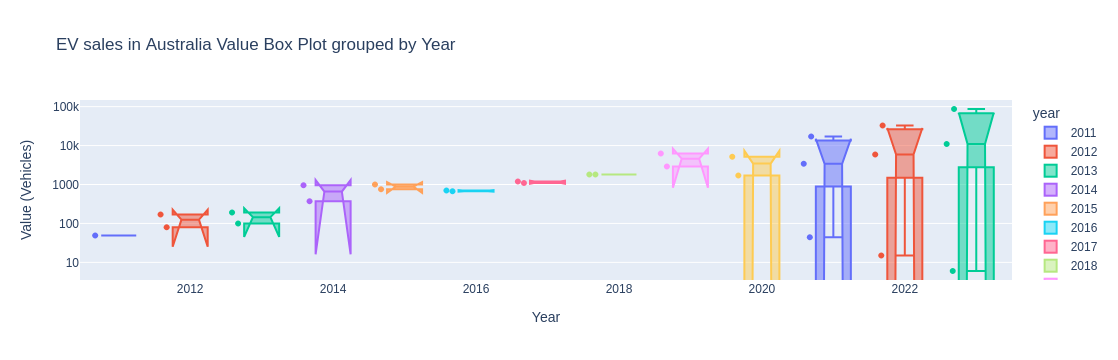

In [37]:
# Scenario D: EV Sales by Year in Australia
print("\n--- Scenario D: EV Sales by Year in Australia ---")
target_parameter_D = 'EV sales'
target_region_D = 'Australia'
df_sales_aus_by_year = df[(df['parameter'] == target_parameter_D) & (df['region'] == target_region_D)].copy()
generate_box_plot(df_sales_aus_by_year,
                  x_col='year',
                  y_col='value',
                  title_prefix=f'{target_parameter_D} in {target_region_D}',
                  use_log_y=True) # Can be useful if sales grow exponentially

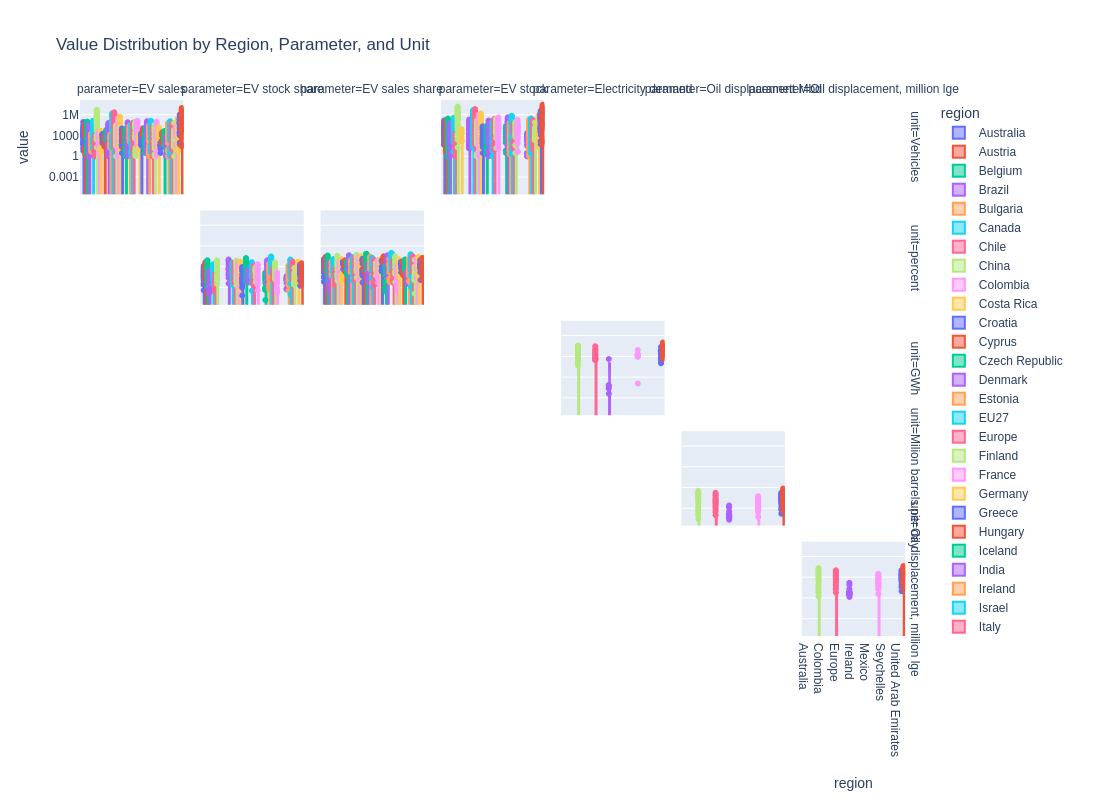

In [38]:
fig_facet.update_layout(height=800) # Adjust height for better readability
fig_facet.show()